C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_12708\1337321373.py:10: DtypeWarning: Columns (17,19,23,27,28,29,30,31,32,34,35,37,38,39,40,44,45,47,48,49,50,51,52,53,54,55,58,59,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_12708\1337321373.py:10: DtypeWarning: Columns (28,46,47,49,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


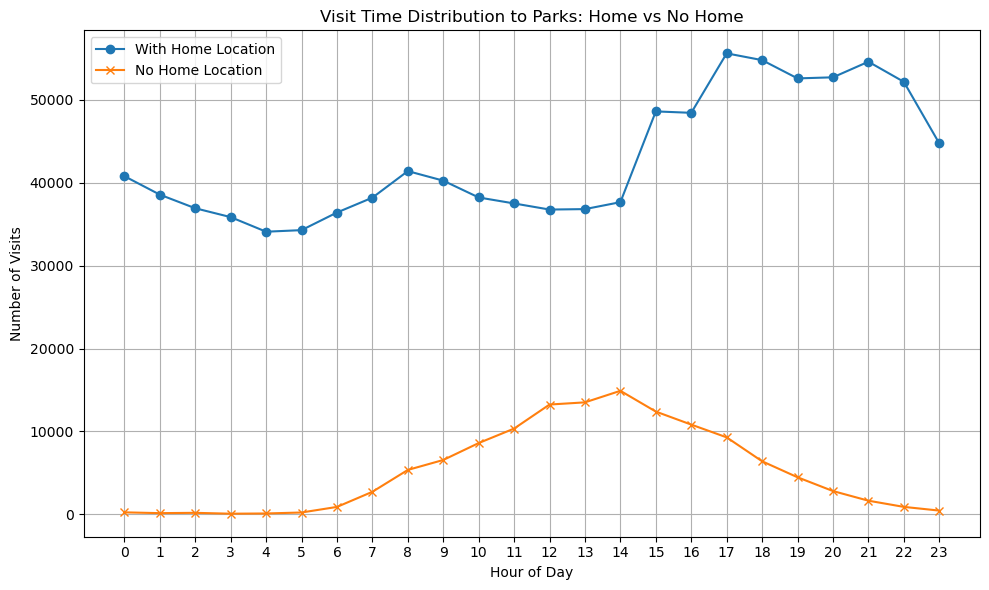

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


file_with_home = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\infostop_with_specific_homelocation_matched_poi.csv"
file_no_home = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\infostop_with_no_homelocation_matched_poi.csv"


def process_visits_by_hour(csv_path, poi_type="park"):
    df = pd.read_csv(csv_path)

    # 统一解析为 datetime（加 UTC）
    df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce', utc=True)

    # 如果当前时区不是 Auckland，则转换
    if df["datetime"].dt.tz is None or str(df["datetime"].dt.tz) != "Pacific/Auckland":
        df["datetime"] = df["datetime"].dt.tz_convert("Pacific/Auckland")

    # 仅保留指定类别
    df = df[df["leisure"] == poi_type].copy()
    df["hour"] = df["datetime"].dt.hour

    return df.groupby("hour").size().reset_index(name="count")

with_home = process_visits_by_hour(file_with_home)
no_home = process_visits_by_hour(file_no_home)


time_dist = pd.merge(
    with_home.rename(columns={"count": "with_home"}),
    no_home.rename(columns={"count": "no_home"}),
    on="hour",
    how="outer"
).fillna(0).sort_values("hour")

plt.figure(figsize=(10,6))
plt.plot(time_dist["hour"], time_dist["with_home"], label="With Home Location", marker='o')
plt.plot(time_dist["hour"], time_dist["no_home"], label="No Home Location", marker='x')
plt.title("Visit Time Distribution to Parks: Home vs No Home")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()